### 1. Importing required libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pandas_profiling
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from keras.constraints import maxnorm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


### 2. Setting seed for reporducability

In [9]:
seed = 10
np.random.seed(seed)

### 3. Importing data from CSV file

In [10]:
data = pd.read_csv('ENB2012_data.csv')


In [11]:
data.shape

(768, 10)

### 4. Renaming columns

In [13]:
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [14]:
data.head()

relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   orientation  glazing_area  glazing_area_distribution  heating_load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   cooling_load  
0         21.33  
1         21.33  
2         21.33  
3         21.33  
4         28.28

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
relative_compactness         768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
overall_height               768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
heating_load                 768 non-null float64
cooling_load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### 5. Checking if there are any missing values

In [16]:
pd.isnull(data).values.any()

False

### 6. Plotting correlations between variables

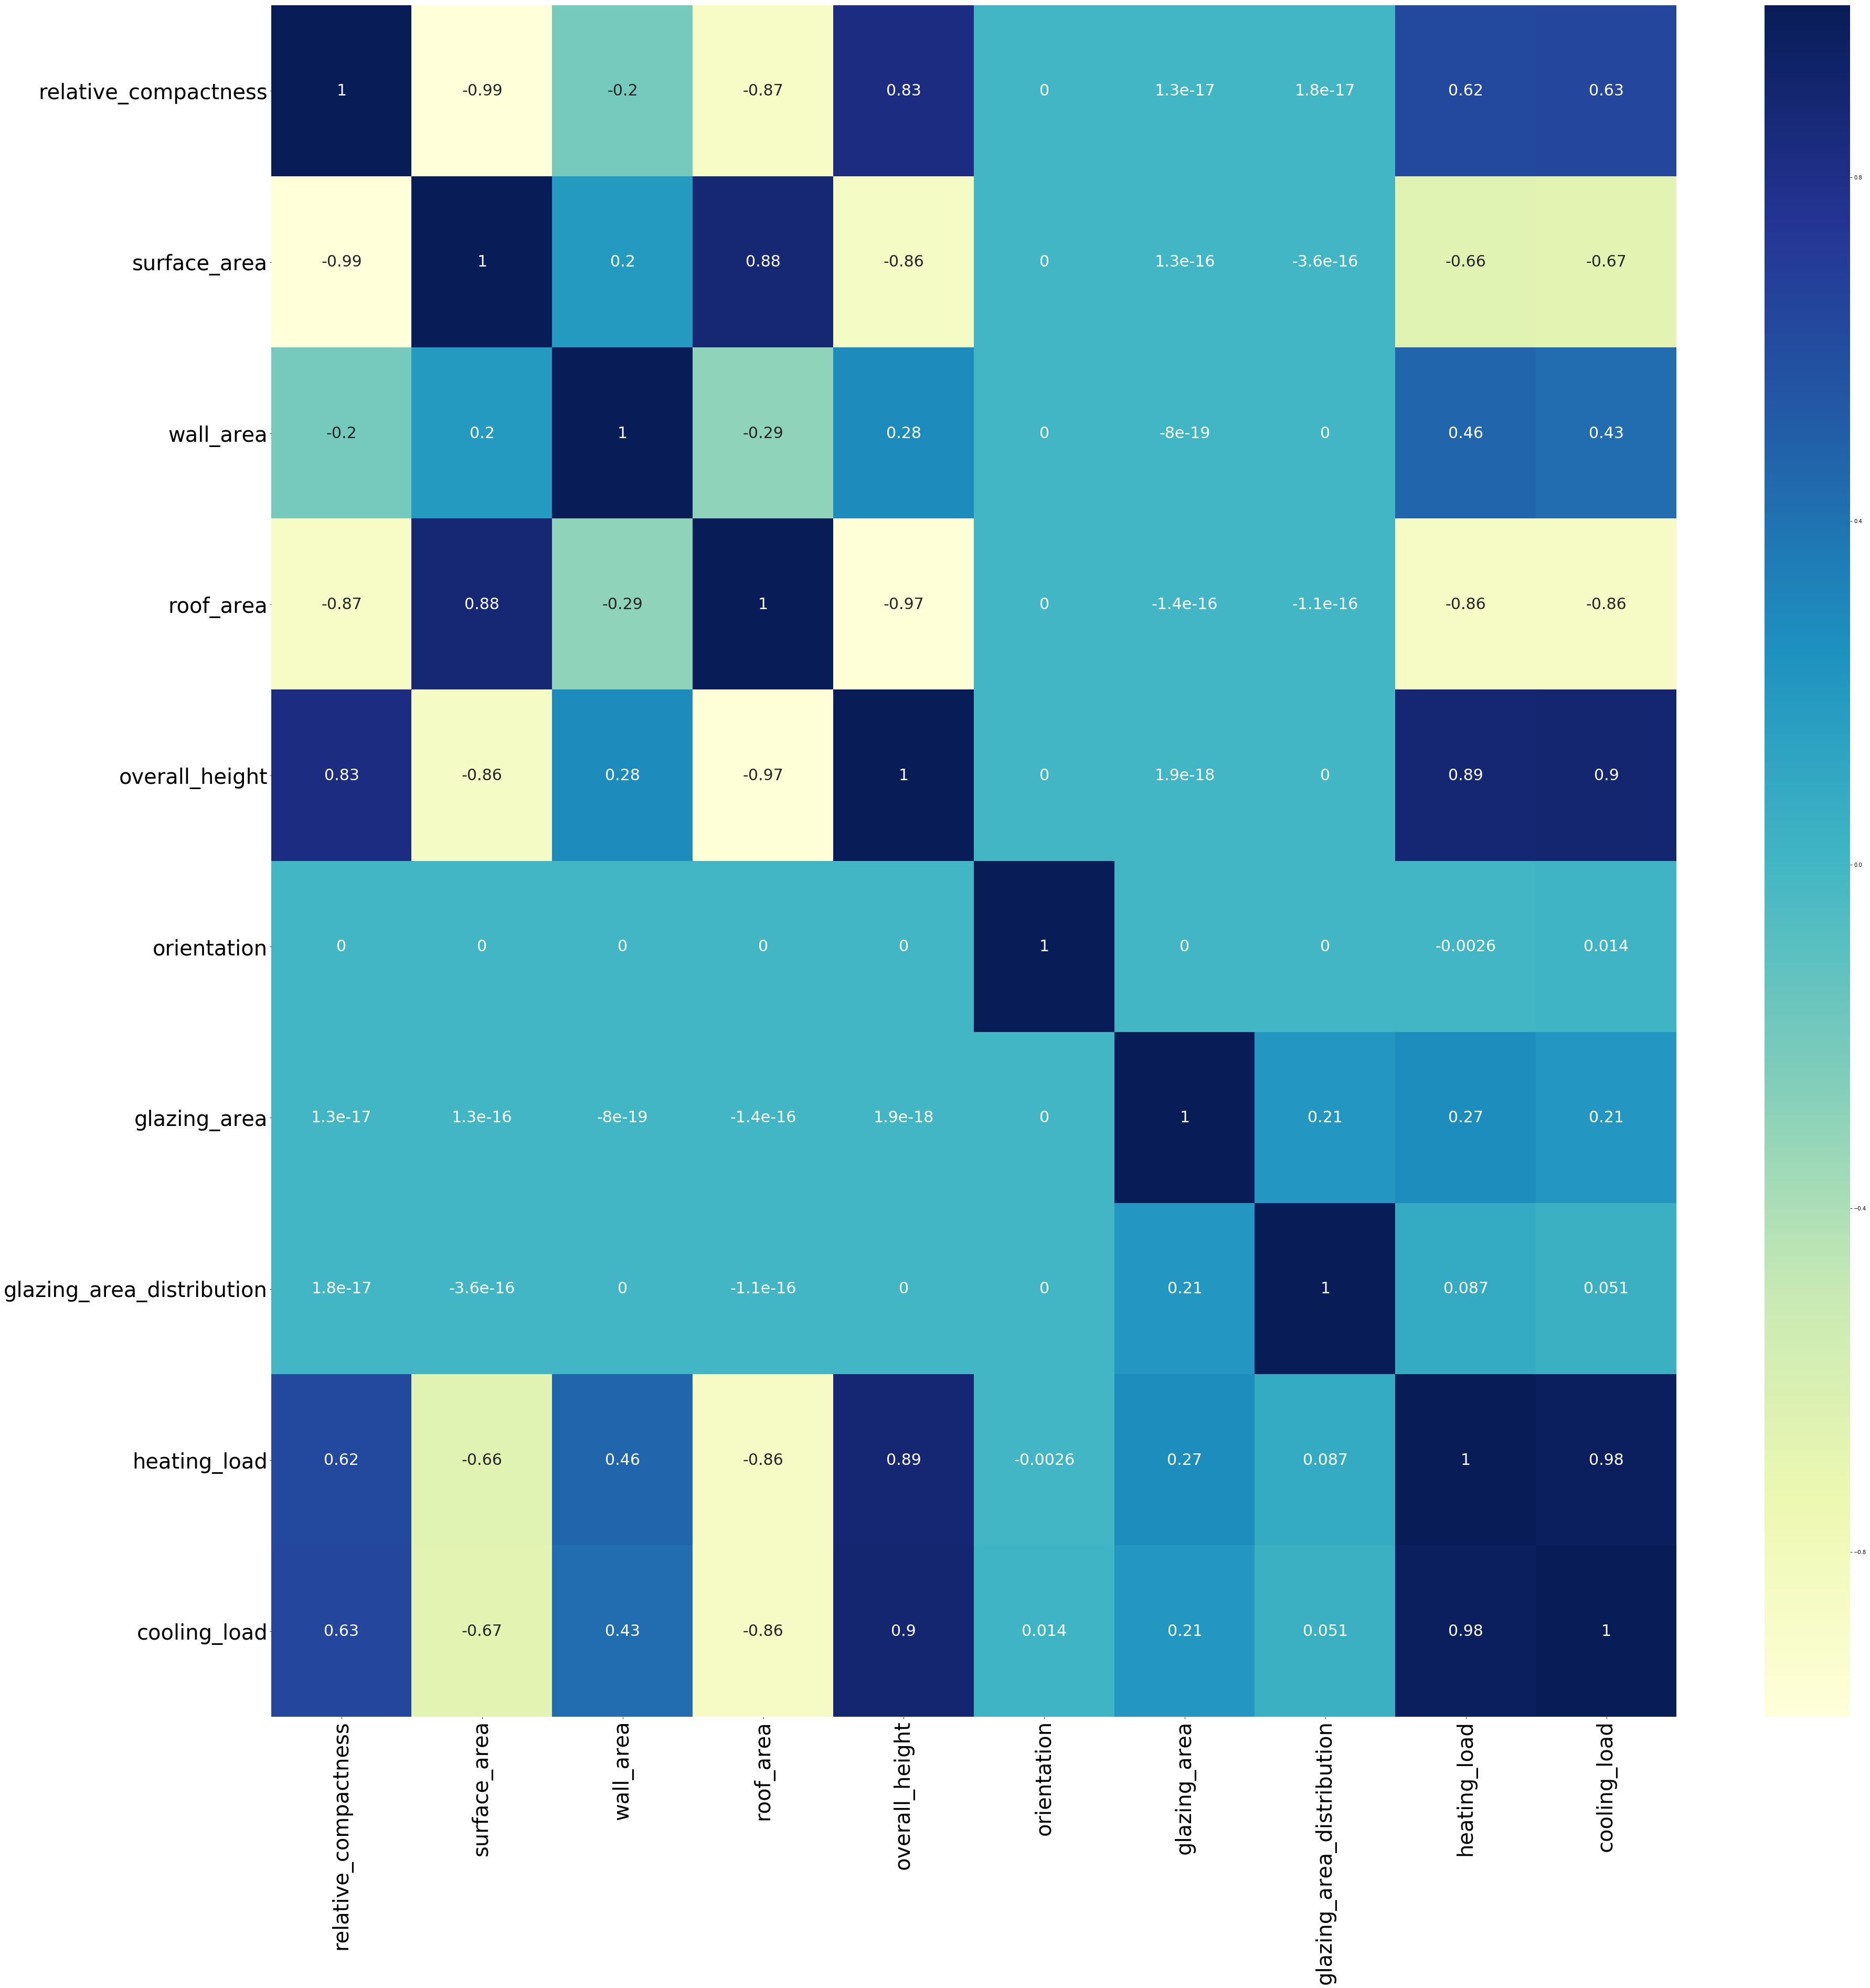

In [17]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(60, 60))
ax.tick_params(labelsize=40)
sns.heatmap(corr, annot=True,annot_kws={"size": 30},cmap='YlGnBu')
plt.show()

#### a. 'overall_height' is highly correlated (positively) with both 'heating_load' and 'cooling_load'
#### b. The second most correlated variable is 'roof_area' (negative correlation)

### 7. Descriptive Analysis

In [19]:
data.describe()

relative_compactness  surface_area   wall_area   roof_area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       overall_height  orientation  glazing_area  glazing_area_distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000                    0.00000   
25%           3.50000     2.750000      0.100000                    1.75000   
50%           5.25000     3.500000      0.250000                    3.00000   
75%           7.00000     4.250000      0.400000                    4.00000   
max           7.00000     5.000000      0.400000                    5.00000   

       heating_load  cooling_load  
count    768.000000    768.000000  
mean      22.307201     24.587760  
std       10.090196      9.513306  
min        6.010000     10.900000  
25%       12.992500     15.620000  
50%       18.950000     22.080000  
75%       31.667500     33.132500  
max       43.100000     48.030000

In [20]:
pandas_profiling.ProfileReport(data)

### 8. Creating X and y datasets

In [21]:
X = data.drop(['heating_load','cooling_load'], axis=1)
y = data[['heating_load','cooling_load']]

In [22]:
X.shape

(768, 8)

In [23]:
y.shape

(768, 2)

### 9. Creating Train and Test datasets from X and y datasets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

### 10. Performing MinMax scaling on the X datasets

In [29]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

### 11. Decision Tree Regressor using GridSearch

In [44]:
dt_reg = DecisionTreeRegressor()
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gs_dt = GridSearchCV(dt_reg, param_grid, cv = 5, return_train_score=True)
gs_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
gs_dt.best_params_

{'max_depth': 9, 'min_samples_leaf': 7}

In [48]:
# Create decision tree model with best params
dt_reg_best = DecisionTreeRegressor(random_state=15, max_depth=9, min_samples_leaf=7)
# Fit the model
dt_reg_best.fit(X_train_scaled, y_train)
# Predict test data
y_pred1 = dt_reg_best.predict(X_test_scaled)

#### 11.1. R2 score of Decision Tree

In [49]:
#R2 score before GridSearch
R2_dt= r2_score(y_test, y_pred1)
R2_dt

0.98069596037245899

### 12. Random Forests using GridSearch

In [55]:
rf_reg = RandomForestRegressor(random_state=10)

param_grid = { 
    'n_estimators': [46,47,48,49,50,51,52],
    'min_samples_split': [11,12,13],
    'min_samples_leaf' : [4,5,6],
    'max_depth' : [5,6,7,8,9,10]
}

gs_rf = GridSearchCV(rf_reg, param_grid, cv= 5)
gs_rf.fit(X_train_scaled, y_train)

gs_rf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 11,
 'n_estimators': 51}

In [56]:
rf_reg_best = RandomForestRegressor(random_state=10, max_depth=8, min_samples_leaf=4, min_samples_split=11, n_estimators=51)
rf_reg_best.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [57]:
y_pred2 = rf_reg_best.predict(X_test_scaled)
R2_rf = r2_score(y_test,y_pred2)
R2_rf

0.98180142857684494

### 13. Linear Regressor


In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
y_pred3=lin_reg.predict(X_test_scaled)
R2_linreg = r2_score(y_test,y_pred3)
R2_linreg

0.91888711144140856

#### 13.1. Linear Regressor with CrossValidation

In [66]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,X,y,cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [ 0.81268522  0.87614028  0.9084094   0.91136949  0.90362651]
Average cross-validation scroe: 0.88


### 14. Ridge Regressor using GridSearch

In [69]:
# finding best alpha by gridsearch
ridge_reg = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

gs_ridge = GridSearchCV(ridge_reg, param_grid, cv=5)
gs_ridge.fit(X_train_scaled, y_train)
gs_ridge.best_params_

{'alpha': 0.01}

In [70]:
ridge_reg_best = Ridge(alpha=0.01)
ridge_reg_best.fit(X_train_scaled, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
y_pred4 = ridge_reg_best.predict(X_test_scaled)
R2_ridge = r2_score(y_test,y_pred4)
R2_ridge

0.91888711144140856

### 15. Lasso Regressor using GridSearch

In [72]:
lasso_reg = Lasso()
param_grid = {'alpha':[0.01,1,2,5,10],
             'max_iter':[1000,10000]}

gs_lasso = GridSearchCV(lasso_reg, param_grid, cv=5)
gs_lasso.fit(X_train_scaled, y_train)
gs_lasso.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [73]:
lasso_reg_best = Lasso(alpha = 0.01, max_iter = 1000)
lasso_reg_best.fit(X_train_scaled, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
y_pred5 = lasso_reg_best.predict(X_test_scaled)
R2_lasso = r2_score(y_test,y_pred5)
R2_lasso

0.91516400666557196

### 16. KNN Regressor

In [76]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()

param_grid = {'n_neighbors':[1,2,3,4,5,7,10,11,12,15]}

gs_knn = GridSearchCV(knn_reg, param_grid, cv=5)
gs_knn.fit(X_train_scaled, y_train)
gs_knn.best_params_

{'n_neighbors': 10}

In [77]:
knn_reg_best = KNeighborsRegressor(n_neighbors=10)
knn_reg_best.fit(X_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [78]:
y_pred6 = knn_reg_best.predict(X_test_scaled)
R2_knn = r2_score(y_test,y_pred6)
R2_knn

0.93985533958295775

### 17. SVR for Heating Load

In [79]:
X = data.drop(['heating_load','cooling_load'], axis=1)
y1 = data[['heating_load']]
y2 = data[['cooling_load']]

In [80]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=0)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [82]:
svr = SVR(kernel = 'linear', epsilon = 0.01)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y1_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))

best param:{'C': 10, 'gamma': 1}
R-squared  score(train) : 0.911


In [92]:
svr = SVR(kernel = 'poly', epsilon = 0.01, degree=2)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y1_train)

print('best params:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))


best params:{'C': 1000, 'gamma': 1}
R-squared  score(train) : 0.959


In [84]:
# creating SVR model with best parameters
svr = SVR( epsilon = 0.01,kernel='linear', C=10, gamma=1)
svr_rbf = SVR( epsilon = 0.01,kernel='rbf', C=1000, gamma=1)
svr_poly = SVR( epsilon = 0.01,kernel='poly',degree=2, C=1000, gamma=0.1)

In [85]:
#calculating score and RME
svr.fit(X_train_scaled, y1_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train_scaled,y1_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr.score(X_test_scaled,y1_test)))
print('MSE for train data set :', metrics.mean_squared_error(y1_train, svr.predict(X_train_scaled)))

R-squared  score(train) : 0.914
R-squared  score(test) : 0.901
MSE for train data set : 8.57998091563


In [86]:
svr_rbf.fit(X_train_scaled, y1_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(X_train_scaled,y1_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_rbf.score(X_test_scaled,y1_test)))
print('MSE for train data set :', metrics.mean_squared_error(y1_train, svr_rbf.predict( X_train_scaled)))

R-squared  score(train) : 0.999
R-squared  score(test) : 0.996
MSE for train data set : 0.128545801421


In [87]:
svr_poly.fit(X_train_scaled, y1_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_poly.score(X_train_scaled,y1_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_poly.score(X_test_scaled,y1_test)))
print('MSE for train data set :', metrics.mean_squared_error(y1_train, svr_poly.predict(X_train_scaled)))

R-squared  score(train) : 0.935
R-squared  score(test) : 0.924
MSE for train data set : 6.50210639274


### 18. SVR for Cooling Load

In [90]:
svr = SVR(kernel = 'linear', epsilon = 0.01)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y2_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))

best param:{'C': 10, 'gamma': 1}
R-squared  score(train) : 0.872


In [91]:
svr = SVR(kernel = 'poly', epsilon = 0.01, degree=2)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y2_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))


best param:{'C': 1000, 'gamma': 1}
R-squared  score(train) : 0.922


In [93]:
# creating SVR model with best parameters
svr = SVR( epsilon = 0.01,kernel='linear', C=10, gamma=1)
svr_rbf = SVR( epsilon = 0.01,kernel='rbf', C=1000, gamma=1)
svr_poly = SVR( epsilon = 0.01,kernel='poly',degree=2, C=1000, gamma=1)

In [94]:
#calculating score and RME
svr.fit(X_train_scaled, y2_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train_scaled,y2_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr.score(X_test_scaled,y2_test)))
print('MSE for train data set :', metrics.mean_squared_error(y2_train, svr.predict(X_train_scaled)))

R-squared  score(train) : 0.879
R-squared  score(test) : 0.883
MSE for train data set : 10.8772923551


In [95]:
svr_rbf.fit(X_train_scaled, y2_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(X_train_scaled,y2_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_rbf.score(X_test_scaled,y2_test)))
print('MSE for train data set :', metrics.mean_squared_error(y2_train, svr_rbf.predict( X_train_scaled)))

R-squared  score(train) : 0.987
R-squared  score(test) : 0.975
MSE for train data set : 1.17252702063


In [94]:
svr_poly.fit(X_train_scaled, y2_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_poly.score(X_train_scaled,y2_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_poly.score(X_test_scaled,y2_test)))
print('MSE for train data set :', metrics.mean_squared_error(y2_train, svr_poly.predict(X_train_scaled)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared  score(train) : 0.929
R-squared  score(test) : 0.941
MSE for train data set : 6.32494758715


### From all the above regression models, we can see that "Random Forests" gave highest R-Square value of "0.9818". 

### So, we can use "Random Forests" for predicting Heat and Cool loading factors with 98.18% accuracy

## Classification of Load Efficiencies

### 19. Calculating Total Load

In [112]:
data['total_load'] = data['heating_load']+data['cooling_load']

### 20. Classifying total_load into 3 ranges

In [113]:
conditions = [
    (data['total_load'] < 40),
    (data['total_load'] > 40) & (data['total_load'] < 65),
    (data['total_load'] > 65)]
choices = ['low', 'medium', 'high']
data['temp_Range'] = np.select(conditions, choices,default=-1)
data.loc[:,['total_load','temp_Range']]

total_load temp_Range
0         36.88        low
1         36.88        low
2         36.88        low
3         36.88        low
4         49.12     medium
5         46.84     medium
6         45.87     medium
7         49.28     medium
8         46.80     medium
9         41.92     medium
10        42.83     medium
11        46.18     medium
12        40.82     medium
13        38.87        low
14        38.11        low
15        40.91     medium
16        66.25       high
17        61.17     medium
18        60.56     medium
19        68.19       high
20        54.56     medium
21        53.61     medium
22        54.56     medium
23        53.33     medium
24        16.97        low
25        17.24        low
26        16.95        low
27        17.21        low
28        17.64        low
29        18.12        low
..          ...        ...
738       88.10       high
739       85.66       high
740       78.19       high
741       79.52       high
742       77.10       high
743       78.04       high
744       31.10        low
745       30.81        low
746       31.11        low
747       31.09        low
748       28.02        low
749       27.21        low
750       28.09        low
751       27.73        low
752       30.75        low
753       30.15        low
754       30.91        low
755       30.95        low
756       32.60        low
757       32.71        low
758       32.47        low
759       33.22        low
760       38.51        low
761       38.40        low
762       38.87        low
763       39.28        low
764       33.42        low
765       33.55        low
766       33.09        low
767       32.67        low

[768 rows x 2 columns]

In [121]:
X = data.drop(['heating_load','cooling_load','total_load','temp_Range'], axis=1)
y = data[['temp_Range']]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [124]:
X_train_scaled.describe()

0           1           2           3           4           5  \
count  576.000000  576.000000  576.000000  576.000000  576.000000  576.000000   
mean     0.392409    0.543258    0.430060    0.612076    0.487847    0.492477   
std      0.291372    0.298947    0.251063    0.408392    0.500287    0.370326   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.111111    0.312500    0.285714    0.333333    0.000000    0.333333   
50%      0.333333    0.583333    0.428571    1.000000    0.000000    0.333333   
75%      0.583333    0.833333    0.571429    1.000000    1.000000    0.666667   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  576.000000  576.000000  
mean     0.592231    0.561806  
std      0.333518    0.307471  
min      0.000000    0.000000  
25%      0.250000    0.400000  
50%      0.625000    0.600000  
75%      1.000000    0.800000  
max      1.000000    1.000000

### 21. KNN Classification

In [125]:
knn = KNeighborsClassifier()
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]
knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
knn_clf.best_params_

{'n_neighbors': 10}

In [127]:
KNN_best = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(KNN_best.score(X_train_scaled, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(KNN_best.score(X_test_scaled, y_test)))

Accuracy of KNN classifier on training set: 0.93
Accuracy of KNN classifier on test set: 0.93


#### 21.1. KNN - Bagging

In [128]:
from sklearn.ensemble import BaggingClassifier

bag_knnclf = BaggingClassifier(KNN_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_knnclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_knnclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_knnclf.score(X_test_scaled,y_test)))

Train score: 0.92
Test score: 0.93


#### 21.2. KNN - Pasting

In [129]:
past_knnclf = BaggingClassifier(KNN_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_knnclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_knnclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_knnclf.score(X_test_scaled,y_test)))

Train score: 0.93
Test score: 0.93


### 22. Principal Component Analysis

#### 22.1. Standardizing the data

In [130]:
from sklearn.preprocessing import StandardScaler
X_train_standard = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test_standard = pd.DataFrame(StandardScaler().fit_transform(X_test))
X_train_standard.describe()

0             1             2             3             4  \
count  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02   
mean  -2.251286e-16 -2.453670e-16  3.245288e-16  3.099373e-16  1.530412e-16   
std    1.000869e+00  1.000869e+00  1.000869e+00  1.000869e+00  1.000869e+00   
min   -1.347934e+00 -1.818817e+00 -1.714447e+00 -1.500049e+00 -9.759828e-01   
25%   -9.662654e-01 -7.725734e-01 -5.754372e-01 -6.831298e-01 -9.759828e-01   
50%   -2.029273e-01  1.341711e-01 -5.932342e-03  9.507086e-01 -9.759828e-01   
75%    6.558280e-01  9.711659e-01  5.635725e-01  9.507086e-01  1.024608e+00   
max    2.087087e+00  1.529163e+00  2.272087e+00  9.507086e-01  1.024608e+00   

                  5             6             7  
count  5.760000e+02  5.760000e+02  5.760000e+02  
mean   1.773273e-16  2.120218e-16  3.039621e-16  
std    1.000869e+00  1.000869e+00  1.000869e+00  
min   -1.331003e+00 -1.777254e+00 -1.828768e+00  
25%   -4.301125e-01 -1.027017e+00 -5.267033e-01  
50%   -4.301125e-01  9.833833e-02  1.243291e-01  
75%    4.707776e-01  1.223694e+00  7.753615e-01  
max    1.371668e+00  1.223694e+00  1.426394e+00

In [131]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_standard)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

5

In [132]:
pca.explained_variance_ratio_.sum()

0.99999999999999989

In [133]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_standard)

In [134]:
pca.n_components_

5

In [135]:
pca = PCA(n_components = 5)
X_train_reduced = pca.fit_transform(X_train_standard)
X_train_recovered = pca.inverse_transform(X_train_reduced)
X_test_reduced = pca.fit_transform(X_test_standard)
X_test_recovered = pca.inverse_transform(X_test_reduced)

In [136]:
print("Shape of X_train_standard :" +str(X_train_standard.shape))
print("Shape of X_train_reduced :" +str(X_train_reduced.shape))
print("Shape of X_test_standard :" +str(X_test_standard.shape))
print("Shape of X_test_reduced :" +str(X_test_reduced.shape))

Shape of X_train_standard :(576, 8)
Shape of X_train_reduced :(576, 5)
Shape of X_test_standard :(192, 8)
Shape of X_test_reduced :(192, 5)


### 23. PCA - KNN using GridSearch

In [137]:
k = np.arange(10)+1
param_knn= {'n_neighbors':k}
knn_pca_clf = GridSearchCV(knn, param_knn, cv=5)
knn_pca_clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
knn_pca_clf.best_params_

{'n_neighbors': 10}

In [139]:
knn_pca_clf_best = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_pca_clf_best.score(X_train_scaled, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn_pca_clf_best.score(X_test_scaled, y_test)))

Accuracy of KNN classifier on training set: 0.93
Accuracy of KNN classifier on test set: 0.93


### 24. Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'] }

In [142]:
logit_clf = GridSearchCV(logit, param_grid,cv=5)
logit_clf.fit(X_train_scaled,y_train)
logit_clf.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [143]:
logit_clf_best = LogisticRegression(C=0.1, penalty = 'l1')
logit_clf_best.fit(X_train_scaled,y_train)

print('Accuracy of logistic regression on training set: {:.2f}'
     .format(logit_clf_best.score(X_train_scaled, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(logit_clf_best.score(X_test_scaled, y_test)))

Accuracy of logistic regression on training set: 0.92
Accuracy of logistic regression on test set: 0.94


#### 24.1. Logistic Regression - Bagging

In [144]:
bag_logitclf = BaggingClassifier(logit_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_logitclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test_scaled,y_test)))

Train score: 0.89
Test score: 0.92


#### 24.2. Logistic Regression - Pasting

In [145]:
past_logitclf = BaggingClassifier(logit_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_logitclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test_scaled,y_test)))

Train score: 0.92
Test score: 0.94


#### 24.3. Logistic Regression - AdaBoosting

In [147]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_logitclf = AdaBoostClassifier(base_estimator = logit_clf_best)

param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
GridSearch_logit = GridSearchCV(adaboost_logitclf, param_grid,cv=5)
GridSearch_logit.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
GridSearch_logit.best_params_

{'learning_rate': 0.1}

In [149]:
adaboost_logitclf_best = AdaBoostClassifier(base_estimator = logit_clf_best, learning_rate = 0.1)
adaboost_logitclf_best.fit(X_train_scaled,y_train)

print('Train score: {0:0.2f}'.format(adaboost_logitclf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_logitclf_best.score(X_test_scaled, y_test)))

Train score: 0.24
Test score: 0.26


### 25. Linear SVM

In [151]:
from sklearn.svm import SVC
LinSVC = SVC(kernel='linear')
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [152]:
LinSVC_clf = GridSearchCV(LinSVC, LinSVM_params,cv=5)
LinSVC_clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [153]:
LinSVC_clf.best_params_

{'C': 1000}

In [154]:
print('Accuracy of linear SVM on training set: {:.2f}'
     .format(LinSVC_clf.score(X_train_scaled, y_train)))
print('Accuracy of linear SVM on test set: {:.2f}'
     .format(LinSVC_clf.score(X_test_scaled, y_test)))

Accuracy of linear SVM on training set: 0.95
Accuracy of linear SVM on test set: 0.95


In [155]:
from sklearn.metrics import confusion_matrix
LinSVC_best = SVC(kernel='linear',C=1).fit(X_train_scaled, y_train)
LinSVC_predicted = LinSVC_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, LinSVC_predicted)

print('Linear SVM \n', confusion)

Linear SVM 
 [[43  0  7]
 [ 0 87  3]
 [ 6  2 44]]


In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LinSVC_predicted))

             precision    recall  f1-score   support

       high       0.88      0.86      0.87        50
        low       0.98      0.97      0.97        90
     medium       0.81      0.85      0.83        52

avg / total       0.91      0.91      0.91       192



#### 25.1. Linear SVM - Bagging

In [157]:
bag_LinSVC = BaggingClassifier(LinSVC_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_LinSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_LinSVC.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_LinSVC.score(X_test_scaled,y_test)))

Train score: 0.89
Test score: 0.91


#### 25.2. Linear SVM - Pasting

In [158]:
past_LinSVC = BaggingClassifier(LinSVC_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_LinSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test_scaled,y_test)))

Train score: 0.92
Test score: 0.94


### 26. Kernelized SVM

In [159]:
KernelSVC = SVC()
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf','poly']}

In [160]:
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [161]:
KernelSVC_clf.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [162]:
print('Accuracy of Kernelized SVM on training set: {:.2f}'
     .format(KernelSVC_clf.score(X_train_scaled, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.2f}'
     .format(KernelSVC_clf.score(X_test_scaled, y_test)))

Accuracy of Kernelized SVM on training set: 0.96
Accuracy of Kernelized SVM on test set: 0.96


In [163]:
KernelSVC_best = SVC(kernel='rbf',C=1000,gamma=0.1).fit(X_train_scaled, y_train)
KernelSVC_predicted = KernelSVC_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, KernelSVC_predicted)

print('Kernelized SVM \n', confusion)

Kernelized SVM 
 [[48  0  2]
 [ 0 89  1]
 [ 2  2 48]]


In [164]:
print(classification_report(y_test, KernelSVC_predicted))

             precision    recall  f1-score   support

       high       0.96      0.96      0.96        50
        low       0.98      0.99      0.98        90
     medium       0.94      0.92      0.93        52

avg / total       0.96      0.96      0.96       192



#### 26.1. Kernelized SVM - Bagging

In [165]:
bag_KernelSVC = BaggingClassifier(KernelSVC_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_KernelSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test_scaled,y_test)))

Train score: 0.89
Test score: 0.92


#### 26.2. Kernelized SVM - Pasting

In [166]:
past_KernelSVC = BaggingClassifier(KernelSVC_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_KernelSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test_scaled,y_test)))

Train score: 0.92
Test score: 0.94


### 27. Decision Trees

In [168]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [5, 10, 20, 50, 100]}

grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [169]:
grid_search.best_params_

{'max_depth': 100}

In [170]:
grid_search.best_score_

0.95486111111111116

In [173]:
dt_clf_best = DecisionTreeClassifier(max_depth = 10)
dt_clf_best.fit(X_train_scaled,y_train)

print('Train score: {0:0.5f}'.format(dt_clf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.5f}'.format(dt_clf_best.score(X_test_scaled, y_test)))

Train score: 0.99306
Test score: 0.98438


In [174]:
dt_predicted = dt_clf_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, dt_predicted)

print('Decision Tree \n', confusion)

Decision Tree 
 [[49  0  1]
 [ 0 90  0]
 [ 2  0 50]]


In [175]:
print(classification_report(y_test, dt_predicted))

             precision    recall  f1-score   support

       high       0.96      0.98      0.97        50
        low       1.00      1.00      1.00        90
     medium       0.98      0.96      0.97        52

avg / total       0.98      0.98      0.98       192



#### 27.1. Decision Trees - Bagging

In [176]:
bag_dtclf = BaggingClassifier(dt_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_dtclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_dtclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_dtclf.score(X_test_scaled,y_test)))

Train score: 1.00
Test score: 0.98


#### 27.2. Decision Trees - Pasting

In [177]:
past_dtclf = BaggingClassifier(dt_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_dtclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_dtclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_dtclf.score(X_test_scaled,y_test)))

Train score: 0.99
Test score: 0.98


#### 27.3. Decision Trees - AdaBoost

In [178]:
adaboost_dtclf = AdaBoostClassifier(base_estimator = dt_clf_best)
param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

GridSearch_dtclf = GridSearchCV(adaboost_dtclf, param_grid,cv=5)
GridSearch_dtclf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [179]:
GridSearch_dtclf.best_params_

{'learning_rate': 0.1}

In [181]:
adaboost_dtclf_best = AdaBoostClassifier(dt_clf_best,learning_rate=0.1)
adaboost_dtclf_best.fit(X_train_scaled, y_train)

print('Train score: {0:0.5f}'.format(adaboost_dtclf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.5f}'.format(adaboost_dtclf_best.score(X_test_scaled, y_test)))

Train score: 1.00000
Test score: 0.97917


#### 27.4. Gradient Boost

In [182]:
from sklearn.ensemble import GradientBoostingClassifier

gb_dtclf = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

GridSearch_gb_dtclf = GridSearchCV(gb_dtclf, param_grid,cv=5)
GridSearch_gb_dtclf.fit(X_train_scaled,y_train)

GridSearch_gb_dtclf.best_params_

{'learning_rate': 0.1}

In [183]:
gb_dtclf_best = GradientBoostingClassifier(learning_rate=0.1)
gb_dtclf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(gb_dtclf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_dtclf_best.score(X_test, y_test)))
print('Feature Importance: '.format(gb_dtclf_best.feature_importances_))

Train score: 0.99
Test score: 0.97
Feature Importance: 


### 28. Random Forests

In [185]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
    'criterion' :['gini', 'entropy']
}

gs_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5)
gs_rf_clf.fit(X_train_scaled, y_train)

gs_rf_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 100}

In [187]:
rf_clf_best = RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 100, max_depth=6, criterion='entropy')
rf_clf_best.fit(X_train_scaled, y_train)

print('Train score: {0:0.5f}'.format(rf_clf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.5f}'.format(rf_clf_best.score(X_test_scaled, y_test)))

Train score: 0.97917
Test score: 0.97396


In [188]:
rf_predicted = rf_clf_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, rf_predicted)

print('Decision Tree \n', confusion)

Decision Tree 
 [[48  0  2]
 [ 0 89  1]
 [ 2  0 50]]


In [189]:
print(classification_report(y_test, rf_predicted))

             precision    recall  f1-score   support

       high       0.96      0.96      0.96        50
        low       1.00      0.99      0.99        90
     medium       0.94      0.96      0.95        52

avg / total       0.97      0.97      0.97       192



#### 28.1. Random Forests - Bagging

In [192]:
bag_rfclf = BaggingClassifier(rf_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_rfclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.5f}'.format(bag_rfclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.5f}'.format(bag_rfclf.score(X_test_scaled,y_test)))

Train score: 0.97743
Test score: 0.96354


#### 28.2. Random Forests - Pasting

In [193]:
from sklearn.ensemble import BaggingClassifier

past_rfclf = BaggingClassifier(rf_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_rfclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.5f}'.format(past_rfclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.5f}'.format(past_rfclf.score(X_test_scaled,y_test)))

Train score: 0.97917
Test score: 0.97396


#### 28.3. Rando Forests - AdaBoost

In [194]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_rfclf = AdaBoostClassifier(base_estimator = rf_clf_best, learning_rate = 0.5)
adaboost_rfclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.5f}'.format(adaboost_rfclf.score(X_train_scaled, y_train)))
print('Test score: {0:0.5f}'.format(adaboost_rfclf.score(X_test_scaled, y_test)))

Train score: 0.92882
Test score: 0.96354


### 29. Ensembles

In [195]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('knn', past_knnclf), ('lr', logit_clf_best), ('dt',bag_dtclf), ('rf',rf_clf_best), ('svc', KernelSVC_clf)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('knn', BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         ma...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [196]:
from sklearn.metrics import accuracy_score

for clf in (past_knnclf, logit_clf_best, bag_dtclf, rf_clf_best, KernelSVC_clf, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.927083333333
LogisticRegression 0.9375
BaggingClassifier 0.979166666667
RandomForestClassifier 0.973958333333
GridSearchCV 0.963541666667
VotingClassifier 0.963541666667


### 30. Deep Learning - Neural Networks

In [201]:
y_final_train = pd.get_dummies(data=y_train['temp_Range'])
y_final_test = pd.get_dummies(data=y_test['temp_Range'])

In [202]:
y_final_train.head()

high  low  medium
762     0    1       0
127     0    1       0
564     0    1       0
375     0    1       0
663     0    1       0

In [240]:
model=Sequential()
model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))

In [241]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [242]:
model.fit(X_train_scaled,y_final_train,epochs=1000,batch_size=32)

Epoch 1/1000
576/576 [==============================] - 1s 950us/step - loss: 0.6197 - acc: 0.6910
Epoch 2/1000
576/576 [==============================] - 0s 54us/step - loss: 0.6016 - acc: 0.7297
Epoch 3/1000
576/576 [==============================] - 0s 54us/step - loss: 0.5839 - acc: 0.8113
Epoch 4/1000
576/576 [==============================] - 0s 54us/step - loss: 0.5667 - acc: 0.8247
Epoch 5/1000
576/576 [==============================] - 0s 54us/step - loss: 0.5485 - acc: 0.8247
Epoch 6/1000
576/576 [==============================] - 0s 54us/step - loss: 0.5303 - acc: 0.8247
Epoch 7/1000
576/576 [==============================] - 0s 54us/step - loss: 0.5124 - acc: 0.8247
Epoch 8/1000
576/576 [==============================] - 0s 27us/step - loss: 0.4947 - acc: 0.8247
Epoch 9/1000
576/576 [==============================] - 0s 81us/step - loss: 0.4780 - acc: 0.8247
Epoch 10/1000
576/576 [==============================] - 0s 54us/step - loss: 0.4622 - acc: 0.8247
Epoch 11/1000
576/

576/576 [==============================] - 0s 54us/step - loss: 0.2975 - acc: 0.8247
Epoch 84/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2973 - acc: 0.8247
Epoch 85/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2971 - acc: 0.8247
Epoch 86/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2969 - acc: 0.8247
Epoch 87/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2967 - acc: 0.8247
Epoch 88/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2965 - acc: 0.8247
Epoch 89/1000
576/576 [==============================] - 0s 27us/step - loss: 0.2963 - acc: 0.8247
Epoch 90/1000
576/576 [==============================] - 0s 27us/step - loss: 0.2961 - acc: 0.8247
Epoch 91/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2960 - acc: 0.8247
Epoch 92/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2958 - acc: 0.8247
Epoch 93/1000
576/576 [=

576/576 [==============================] - 0s 81us/step - loss: 0.2589 - acc: 0.8247
Epoch 166/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2573 - acc: 0.8247
Epoch 167/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2557 - acc: 0.8229
Epoch 168/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2551 - acc: 0.8223
Epoch 169/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2533 - acc: 0.8275
Epoch 170/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2526 - acc: 0.8438
Epoch 171/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2513 - acc: 0.8501
Epoch 172/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2501 - acc: 0.8808
Epoch 173/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2488 - acc: 0.8964
Epoch 174/1000
576/576 [==============================] - 0s 54us/step - loss: 0.2478 - acc: 0.8947
Epoch 175/1000


576/576 [==============================] - 0s 54us/step - loss: 0.1968 - acc: 0.9294
Epoch 247/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1959 - acc: 0.9340
Epoch 248/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1950 - acc: 0.9323
Epoch 249/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1946 - acc: 0.9311
Epoch 250/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1939 - acc: 0.9288
Epoch 251/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1936 - acc: 0.9352
Epoch 252/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1941 - acc: 0.9288
Epoch 253/1000
576/576 [==============================] - 0s 136us/step - loss: 0.1923 - acc: 0.9369
Epoch 254/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1916 - acc: 0.9317
Epoch 255/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1912 - acc: 0.9352
Epoch 256/1000

576/576 [==============================] - 0s 54us/step - loss: 0.1462 - acc: 0.9595
Epoch 328/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1451 - acc: 0.9560
Epoch 329/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1436 - acc: 0.9595
Epoch 330/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1426 - acc: 0.9589
Epoch 331/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1420 - acc: 0.9618
Epoch 332/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1418 - acc: 0.9583
Epoch 333/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1410 - acc: 0.9618
Epoch 334/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1399 - acc: 0.9612
Epoch 335/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1393 - acc: 0.9635
Epoch 336/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1386 - acc: 0.9612
Epoch 337/1000


576/576 [==============================] - 0s 54us/step - loss: 0.1089 - acc: 0.9693
Epoch 410/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1087 - acc: 0.9699
Epoch 411/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1085 - acc: 0.9682
Epoch 412/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1084 - acc: 0.9693
Epoch 413/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1082 - acc: 0.9693
Epoch 414/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1080 - acc: 0.9693
Epoch 415/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1081 - acc: 0.9693
Epoch 416/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1071 - acc: 0.9705
Epoch 417/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1073 - acc: 0.9693
Epoch 418/1000
576/576 [==============================] - 0s 81us/step - loss: 0.1086 - acc: 0.9688
Epoch 419/1000


576/576 [==============================] - 0s 54us/step - loss: 0.0946 - acc: 0.9722
Epoch 491/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0944 - acc: 0.9734
Epoch 492/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0940 - acc: 0.9722
Epoch 493/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0943 - acc: 0.9722
Epoch 494/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0938 - acc: 0.9728
Epoch 495/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0935 - acc: 0.9728
Epoch 496/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0936 - acc: 0.9716
Epoch 497/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0934 - acc: 0.9734
Epoch 498/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0935 - acc: 0.9734
Epoch 499/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0937 - acc: 0.9705
Epoch 500/1000


576/576 [==============================] - 0s 54us/step - loss: 0.0858 - acc: 0.9751
Epoch 573/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0858 - acc: 0.9734
Epoch 574/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0858 - acc: 0.9745
Epoch 575/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0853 - acc: 0.9745
Epoch 576/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0862 - acc: 0.9740
Epoch 577/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0863 - acc: 0.9740
Epoch 578/1000
576/576 [==============================] - 0s 27us/step - loss: 0.0863 - acc: 0.9740
Epoch 579/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0856 - acc: 0.9740
Epoch 580/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0851 - acc: 0.9740
Epoch 581/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0849 - acc: 0.9745
Epoch 582/1000


576/576 [==============================] - 0s 54us/step - loss: 0.0804 - acc: 0.9740
Epoch 655/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0808 - acc: 0.9734
Epoch 656/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0806 - acc: 0.9734
Epoch 657/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0805 - acc: 0.9751
Epoch 658/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0809 - acc: 0.9734
Epoch 659/1000
576/576 [==============================] - 0s 27us/step - loss: 0.0803 - acc: 0.9745
Epoch 660/1000
576/576 [==============================] - 0s 27us/step - loss: 0.0807 - acc: 0.9745
Epoch 661/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0805 - acc: 0.9740
Epoch 662/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0801 - acc: 0.9734
Epoch 663/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0802 - acc: 0.9740
Epoch 664/1000


576/576 [==============================] - 0s 54us/step - loss: 0.0782 - acc: 0.9769
Epoch 737/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0795 - acc: 0.9745
Epoch 738/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0779 - acc: 0.9757
Epoch 739/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0775 - acc: 0.9780
Epoch 740/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0778 - acc: 0.9734
Epoch 741/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0786 - acc: 0.9751
Epoch 742/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0792 - acc: 0.9734
Epoch 743/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0780 - acc: 0.9757
Epoch 744/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0776 - acc: 0.9774
Epoch 745/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0770 - acc: 0.9734
Epoch 746/1000


576/576 [==============================] - 0s 81us/step - loss: 0.0752 - acc: 0.9734
Epoch 819/1000
576/576 [==============================] - 0s 27us/step - loss: 0.0753 - acc: 0.9740
Epoch 820/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0756 - acc: 0.9745
Epoch 821/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0751 - acc: 0.9734
Epoch 822/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0756 - acc: 0.9757
Epoch 823/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0751 - acc: 0.9745
Epoch 824/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0759 - acc: 0.9745
Epoch 825/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0751 - acc: 0.9740
Epoch 826/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0751 - acc: 0.9734
Epoch 827/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0754 - acc: 0.9763
Epoch 828/1000


576/576 [==============================] - 0s 54us/step - loss: 0.0731 - acc: 0.9740
Epoch 901/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0735 - acc: 0.9734
Epoch 902/1000
576/576 [==============================] - 0s 109us/step - loss: 0.0732 - acc: 0.9757
Epoch 903/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0736 - acc: 0.9745
Epoch 904/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0730 - acc: 0.9745
Epoch 905/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0747 - acc: 0.9757
Epoch 906/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0735 - acc: 0.9734
Epoch 907/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0738 - acc: 0.9757
Epoch 908/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0731 - acc: 0.9763
Epoch 909/1000
576/576 [==============================] - 0s 81us/step - loss: 0.0734 - acc: 0.9734
Epoch 910/1000

576/576 [==============================] - 0s 54us/step - loss: 0.0722 - acc: 0.9734
Epoch 983/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0722 - acc: 0.9774
Epoch 984/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0713 - acc: 0.9757
Epoch 985/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0724 - acc: 0.9734
Epoch 986/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0719 - acc: 0.9769
Epoch 987/1000
576/576 [==============================] - 0s 27us/step - loss: 0.0715 - acc: 0.9734
Epoch 988/1000
576/576 [==============================] - 0s 27us/step - loss: 0.0721 - acc: 0.9780
Epoch 989/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0718 - acc: 0.9745
Epoch 990/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0718 - acc: 0.9740
Epoch 991/1000
576/576 [==============================] - 0s 54us/step - loss: 0.0715 - acc: 0.9734
Epoch 992/1000


In [243]:
scores = model.evaluate(X_test_scaled, y_final_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 1ms/step

acc: 98.26%


### For classification of efficiencies based on total load, Neural Networks is the best model with accuracy score of 98.26%